In [1]:
import scanpy as sc
import infercnvpy as cnv
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
import os

ModuleNotFoundError: No module named 'scanpy'

In [5]:
cnv.__version__

'0.5.0'

In [2]:
pip install infercnvpy

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/disir_package-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/STAGATE-1.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached infercnvpy-0.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached gtfparse-2.5.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached pytest_benchmark-4.0.0-py3-none-any.whl.metadata (23 kB)
  Using cached pytoml-0.1.21-py2.py3

In [88]:
# Settings
sc.settings.set_figure_params(figsize=(5,5), dpi_save=400, dpi=100)
sc.settings.figdir = '/project/data/gew123/CNV/Figures'

Read in final atlas

In [4]:
adata = sc.read_h5ad('/project/data/gew123/Cell_Annotation/FINAL_ATLAS_OBJECTS/final_atlas_annotated.h5ad')

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


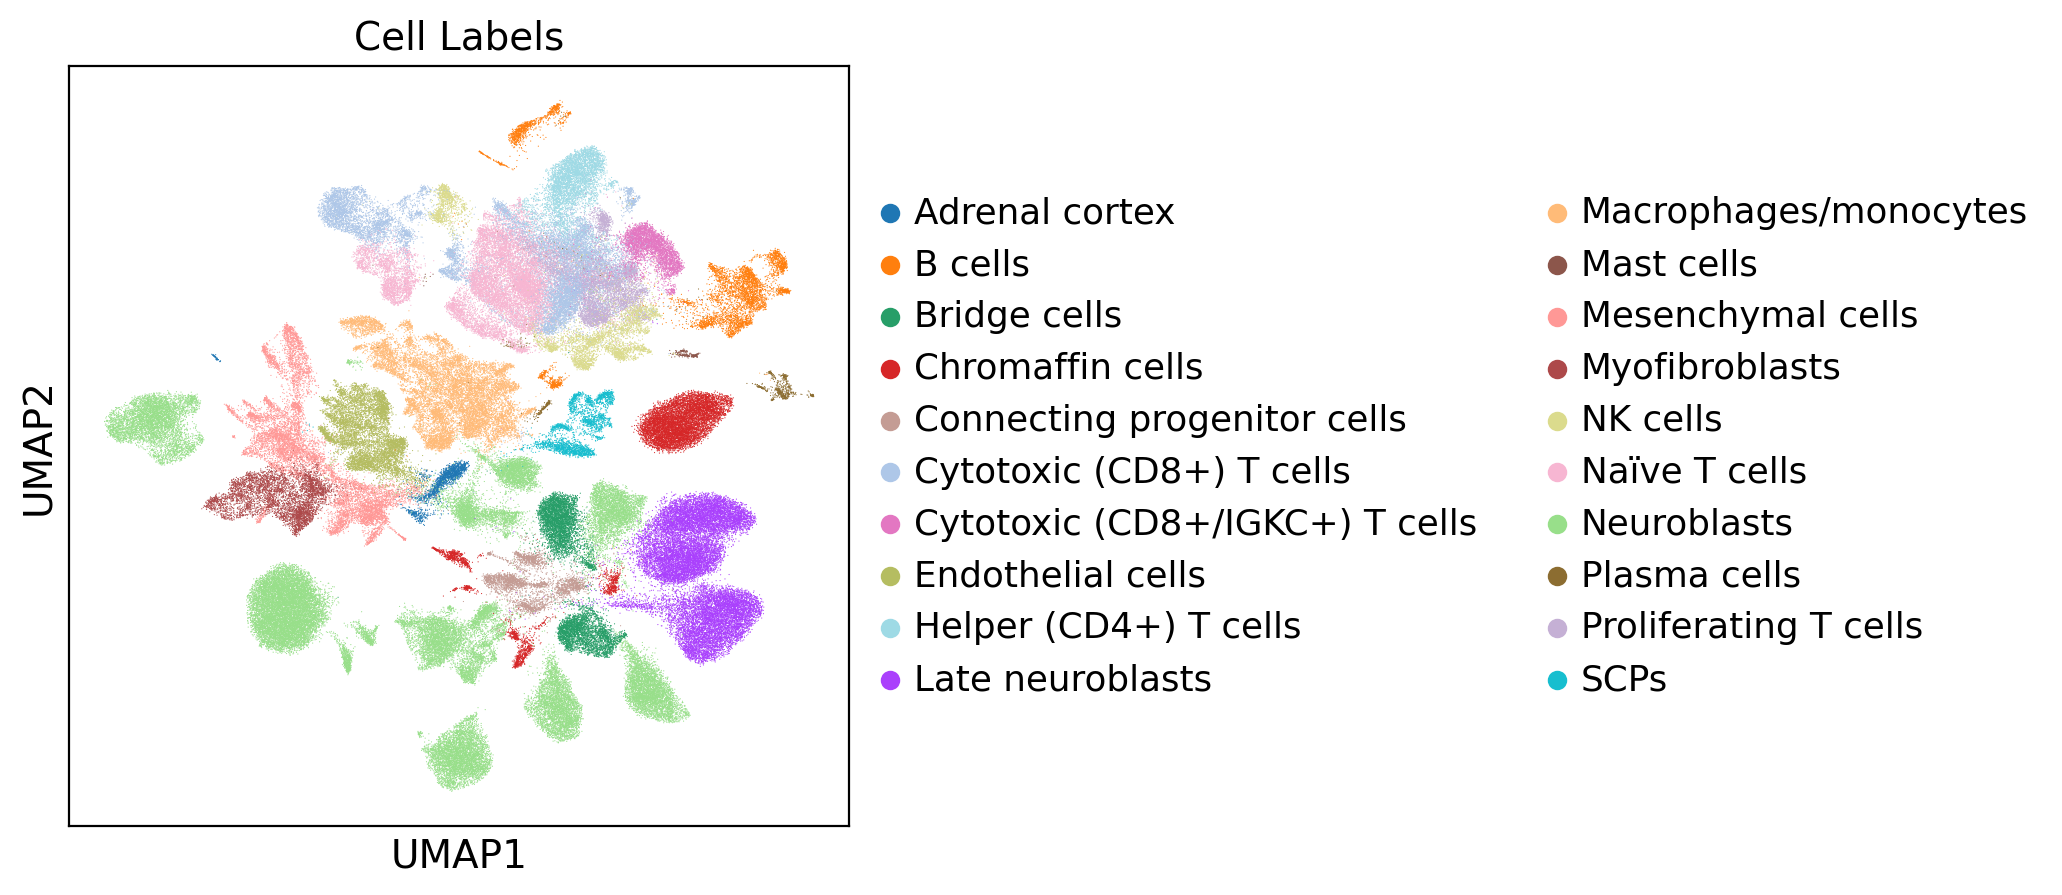

In [68]:
sc.pl.umap(adata, color="annotations_final", title = 'Cell Labels', save='Control_Atlas_UMAP.png')

In [5]:
adata.layers

Layers with keys: log_counts, raw_counts

In [5]:
# Set log counts
adata.X = adata.layers['log_counts']

Documentation notes:

In [ ]:
# Requires a “reference” value to which the expression of genomic regions is compared
# If your dataset contains different cell types and includes both tumor and normal cells
# the average of all cells can be used as reference (default)

# If you already know which cells are “normal”, you can provide a column
# from adata.obs to reference_key that contains the annotation.
# reference_cat specifies one or multiple values in reference_key that refer to normal cells.

Can try with:
    
a) All immune cells in atlas set to normal cells (reference)

b) Setting reference to numpy array of average gene expression values from separate control dataset (Jansky)

#### Adding gene positions to adata

In [6]:
gene_pos = pd.read_table("/project/data/nb24/CNV_Detection/data/hg38_gencode_v27.txt",header=None)
gene_pos.columns = ["gene", "chromosome","start","end"]
gene_pos

gene chromosome  start    end
0          DDX11L1       chr1  11869  14409
1           WASH7P       chr1  14404  29570
2        MIR6859-1       chr1  17369  17436
3      MIR1302-2HG       chr1  29554  31109
4        MIR1302-2       chr1  30366  30503
...            ...        ...    ...    ...
56604       MT-ND6       chrM  14149  14673
56605        MT-TE       chrM  14674  14742
56606       MT-CYB       chrM  14747  15887
56607        MT-TT       chrM  15888  15953
56608        MT-TP       chrM  15956  16023

[56609 rows x 4 columns]

In [7]:
# Create column with genes
adata_var_copy = adata.var.copy()
adata_var_copy["gene"] = adata_var_copy.index
adata_var_copy

mt   ribo     hb  n_cells_by_counts  mean_counts  \
5S_rRNA     False  False  False                  2     0.000011   
5S_rRNA-1   False  False  False                  0     0.000000   
7SK         False  False  False               2234     0.013235   
7SK-1       False  False  False                  0     0.000000   
7SK.2       False  False  False                456     0.003255   
...           ...    ...    ...                ...          ...   
uc_338-2    False  False  False                  3     0.000016   
uc_338-3    False  False  False                  2     0.000011   
uc_338-4    False  False  False                  1     0.000005   
uc_338-5    False  False  False                  0     0.000000   
yR211F11.2  False  False  False                  2     0.000011   

            log1p_mean_counts  pct_dropout_by_counts  total_counts  \
5S_rRNA              0.000011              99.998917           2.0   
5S_rRNA-1            0.000000             100.000000           0.0   
7SK                  0.013148              98.790248        2444.0   
7SK-1                0.000000             100.000000           0.0   
7SK.2                0.003249              99.753068         601.0   
...                       ...                    ...           ...   
uc_338-2             0.000016              99.998375           3.0   
uc_338-3             0.000011              99.998917           2.0   
uc_338-4             0.000005              99.999458           1.0   
uc_338-5             0.000000             100.000000           0.0   
yR211F11.2           0.000011              99.998917           2.0   

            log1p_total_counts  highly_variable     means  dispersions  \
5S_rRNA               1.098612            False  0.000092     0.053934   
5S_rRNA-1             0.000000            False  0.000000     0.000000   
7SK                   7.801800            False  0.005454     0.205030   
7SK-1                 0.000000            False  0.000000     0.000000   
7SK.2                 6.400257            False  0.001576     0.257956   
...                        ...              ...       ...          ...   
uc_338-2              1.386294            False  0.000189     0.069000   
uc_338-3              1.098612            False  0.000068     0.040170   
uc_338-4              0.693147            False  0.000035     0.031449   
uc_338-5              0.000000            False  0.000000     0.000000   
yR211F11.2            1.098612            False  0.000089     0.039738   

            dispersions_norm  highly_variable_nbatches  \
5S_rRNA             0.097168                         0   
5S_rRNA-1           0.000000                         0   
7SK                 0.237260                         0   
7SK-1               0.000000                         0   
7SK.2               0.814536                         1   
...                      ...                       ...   
uc_338-2            0.141076                         0   
uc_338-3           -0.059456                         0   
uc_338-4           -0.025258                         0   
uc_338-5            0.000000                         0   
yR211F11.2         -0.013562                         0   

            highly_variable_intersection        gene  
5S_rRNA                            False     5S_rRNA  
5S_rRNA-1                          False   5S_rRNA-1  
7SK                                False         7SK  
7SK-1                              False       7SK-1  
7SK.2                              False       7SK.2  
...                                  ...         ...  
uc_338-2                           False    uc_338-2  
uc_338-3                           False    uc_338-3  
uc_338-4                           False    uc_338-4  
uc_338-5                           False    uc_338-5  
yR211F11.2                         False  yR211F11.2  

[64612 rows x 16 columns]

In [8]:
# Merge
result = pd.merge(adata_var_copy, gene_pos, on="gene", how="left") # Merges gene_pos information on gene

# Fix type
result['start'] = result['start'].astype('Int64')
result['end'] = result['end'].astype('Int64')

# Reorder
result.index = adata.var.index
result

mt   ribo     hb  n_cells_by_counts  mean_counts  \
5S_rRNA     False  False  False                  2     0.000011   
5S_rRNA-1   False  False  False                  0     0.000000   
7SK         False  False  False               2234     0.013235   
7SK-1       False  False  False                  0     0.000000   
7SK.2       False  False  False                456     0.003255   
...           ...    ...    ...                ...          ...   
uc_338-2    False  False  False                  3     0.000016   
uc_338-3    False  False  False                  2     0.000011   
uc_338-4    False  False  False                  1     0.000005   
uc_338-5    False  False  False                  0     0.000000   
yR211F11.2  False  False  False                  2     0.000011   

            log1p_mean_counts  pct_dropout_by_counts  total_counts  \
5S_rRNA              0.000011              99.998917           2.0   
5S_rRNA-1            0.000000             100.000000           0.0   
7SK                  0.013148              98.790248        2444.0   
7SK-1                0.000000             100.000000           0.0   
7SK.2                0.003249              99.753068         601.0   
...                       ...                    ...           ...   
uc_338-2             0.000016              99.998375           3.0   
uc_338-3             0.000011              99.998917           2.0   
uc_338-4             0.000005              99.999458           1.0   
uc_338-5             0.000000             100.000000           0.0   
yR211F11.2           0.000011              99.998917           2.0   

            log1p_total_counts  highly_variable     means  dispersions  \
5S_rRNA               1.098612            False  0.000092     0.053934   
5S_rRNA-1             0.000000            False  0.000000     0.000000   
7SK                   7.801800            False  0.005454     0.205030   
7SK-1                 0.000000            False  0.000000     0.000000   
7SK.2                 6.400257            False  0.001576     0.257956   
...                        ...              ...       ...          ...   
uc_338-2              1.386294            False  0.000189     0.069000   
uc_338-3              1.098612            False  0.000068     0.040170   
uc_338-4              0.693147            False  0.000035     0.031449   
uc_338-5              0.000000            False  0.000000     0.000000   
yR211F11.2            1.098612            False  0.000089     0.039738   

            dispersions_norm  highly_variable_nbatches  \
5S_rRNA             0.097168                         0   
5S_rRNA-1           0.000000                         0   
7SK                 0.237260                         0   
7SK-1               0.000000                         0   
7SK.2               0.814536                         1   
...                      ...                       ...   
uc_338-2            0.141076                         0   
uc_338-3           -0.059456                         0   
uc_338-4           -0.025258                         0   
uc_338-5            0.000000                         0   
yR211F11.2         -0.013562                         0   

            highly_variable_intersection        gene chromosome      start  \
5S_rRNA                            False     5S_rRNA       chr1  143439605   
5S_rRNA-1                          False   5S_rRNA-1        NaN       <NA>   
7SK                                False         7SK       chr1  120228046   
7SK-1                              False       7SK-1        NaN       <NA>   
7SK.2                              False       7SK.2        NaN       <NA>   
...                                  ...         ...        ...        ...   
uc_338-2                           False    uc_338-2        NaN       <NA>   
uc_338-3                           False    uc_338-3        NaN       <NA>   
uc_338-4                           False    uc_338-4        NaN       <NA>   
uc_

In [9]:
# Update adata
adata.var["chromosome"] = result["chromosome"]
adata.var["start"] = result["start"]
adata.var["end"] = result["end"]
adata.var

mt   ribo     hb  n_cells_by_counts  mean_counts  \
5S_rRNA     False  False  False                  2     0.000011   
5S_rRNA-1   False  False  False                  0     0.000000   
7SK         False  False  False               2234     0.013235   
7SK-1       False  False  False                  0     0.000000   
7SK.2       False  False  False                456     0.003255   
...           ...    ...    ...                ...          ...   
uc_338-2    False  False  False                  3     0.000016   
uc_338-3    False  False  False                  2     0.000011   
uc_338-4    False  False  False                  1     0.000005   
uc_338-5    False  False  False                  0     0.000000   
yR211F11.2  False  False  False                  2     0.000011   

            log1p_mean_counts  pct_dropout_by_counts  total_counts  \
5S_rRNA              0.000011              99.998917           2.0   
5S_rRNA-1            0.000000             100.000000           0.0   
7SK                  0.013148              98.790248        2444.0   
7SK-1                0.000000             100.000000           0.0   
7SK.2                0.003249              99.753068         601.0   
...                       ...                    ...           ...   
uc_338-2             0.000016              99.998375           3.0   
uc_338-3             0.000011              99.998917           2.0   
uc_338-4             0.000005              99.999458           1.0   
uc_338-5             0.000000             100.000000           0.0   
yR211F11.2           0.000011              99.998917           2.0   

            log1p_total_counts  highly_variable     means  dispersions  \
5S_rRNA               1.098612            False  0.000092     0.053934   
5S_rRNA-1             0.000000            False  0.000000     0.000000   
7SK                   7.801800            False  0.005454     0.205030   
7SK-1                 0.000000            False  0.000000     0.000000   
7SK.2                 6.400257            False  0.001576     0.257956   
...                        ...              ...       ...          ...   
uc_338-2              1.386294            False  0.000189     0.069000   
uc_338-3              1.098612            False  0.000068     0.040170   
uc_338-4              0.693147            False  0.000035     0.031449   
uc_338-5              0.000000            False  0.000000     0.000000   
yR211F11.2            1.098612            False  0.000089     0.039738   

            dispersions_norm  highly_variable_nbatches  \
5S_rRNA             0.097168                         0   
5S_rRNA-1           0.000000                         0   
7SK                 0.237260                         0   
7SK-1               0.000000                         0   
7SK.2               0.814536                         1   
...                      ...                       ...   
uc_338-2            0.141076                         0   
uc_338-3           -0.059456                         0   
uc_338-4           -0.025258                         0   
uc_338-5            0.000000                         0   
yR211F11.2         -0.013562                         0   

            highly_variable_intersection chromosome      start        end  
5S_rRNA                            False       chr1  143439605  143439714  
5S_rRNA-1                          False        NaN       <NA>       <NA>  
7SK                                False       chr1  120228046  120228295  
7SK-1                              False        NaN       <NA>       <NA>  
7SK.2                              False        NaN       <NA>       <NA>  
...                                  ...        ...        ...        ...  
uc_338-2                           False        NaN       <NA>       <NA>  
uc_338-3                           False        NaN       <NA>       <NA>  
uc_338-4                           False        NaN       <NA>       <NA>  
uc_338-5               

In [14]:
list(adata.obs['annotations_final'].unique())

['Neuroblasts',
 'Cytotoxic (CD8+) T cells',
 'Macrophages/monocytes',
 'Mesenchymal cells',
 'B cells',
 'Bridge cells',
 'Endothelial cells',
 'Connecting progenitor cells',
 'Naïve T cells',
 'Late neuroblasts',
 'Plasma cells',
 'Proliferating T cells',
 'Myofibroblasts',
 'SCPs',
 'Adrenal cortex',
 'Chromaffin cells',
 'NK cells',
 'Mast cells',
 'Cytotoxic (CD8+/IGKC+) T cells',
 'Helper (CD4+) T cells']

... storing 'infercnv_reference' as categorical
... storing 'chromosome' as categorical
/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


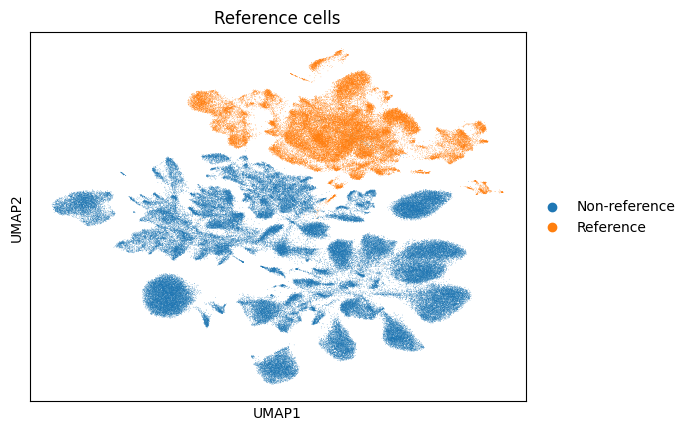

In [10]:
# Setting immune cells as control cells -- excluding Macrophages/monocytes to make reference cleaner
immune_cells = ['Cytotoxic (CD8+) T cells', 'B cells', 'Naïve T cells', 'Plasma cells',
                'NK cells', 'Mast cells', 'Cytotoxic (CD8+/IGKC+) T cells', 'Helper (CD4+) T cells', 'Proliferating T cells']

def assign_infercnv_column(row):
    if row["annotations_final"] in (immune_cells):
        return "Reference"
    else:
        return "Non-reference"

adata.obs['infercnv_reference'] = adata.obs.apply(assign_infercnv_column, axis=1)

# Check plot
sc.pl.umap(adata, color="infercnv_reference", title = 'Reference cells', save='CNV_Reference_Cells_UMAP.png')

In [11]:
# Run CNV detection
cnv.tl.infercnv(adata,
                reference_key = "infercnv_reference", # column in adata.obs with reference classification
                reference_cat = "Reference", # Identifies which cells are reference
                window_size=250, # Default
                n_jobs=1) 

  0%|          | 0/36 [00:00<?, ?it/s]

In [15]:
# Save
adata.write('/project/data/gew123/CNV/cnv_object_inprogress.h5ad')

In [13]:
# Cluster the cnv matrix (defaults to cnv results matrix)
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
2024-07-26 16:54:16.816427: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-26 16:54:18.702001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
cnv.tl.umap(adata)
cnv.tl.cnv_score(adata)

In [ ]:
# Resave
adata.write('/project/data/gew123/CNV/cnv_object_inprogress.h5ad')

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


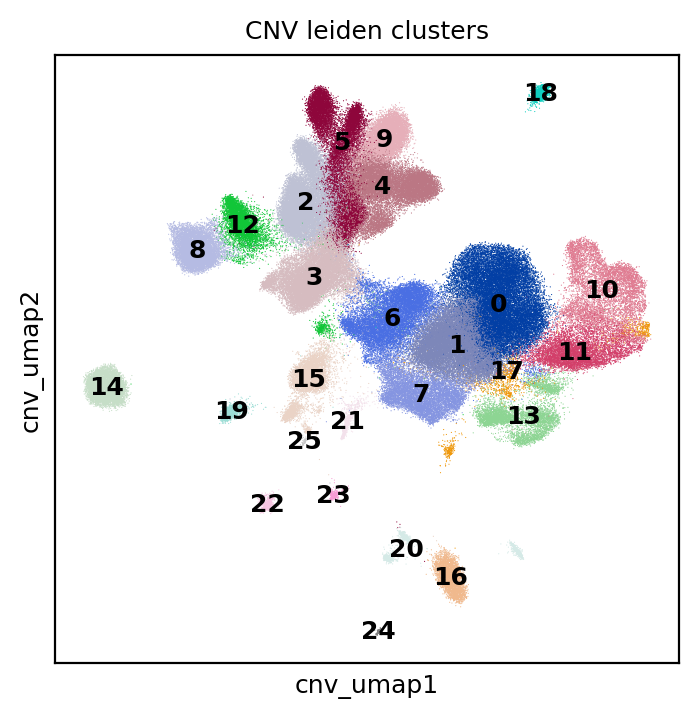

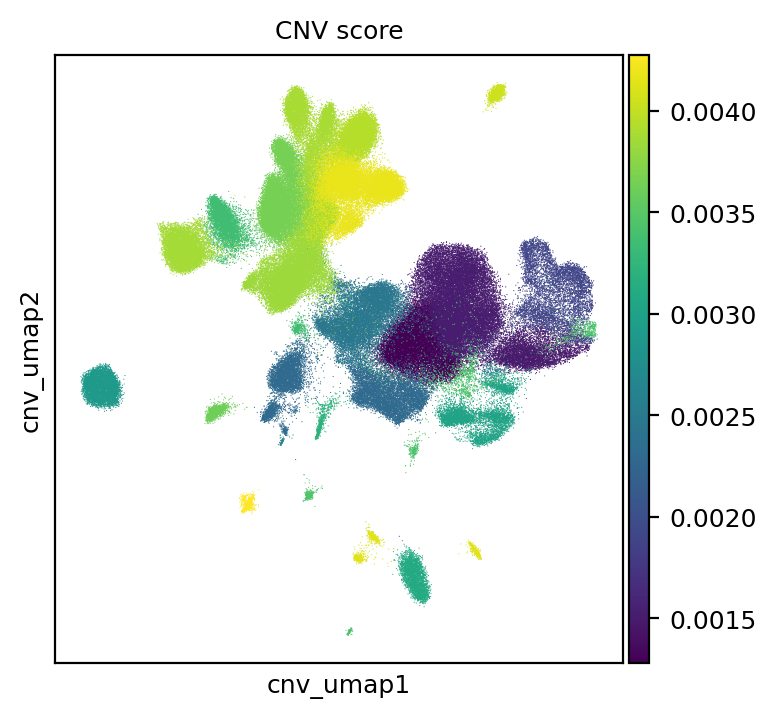

/project/soft/linux64/anaconda/Anaconda3-2023.09-0-Linux-x86_64/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


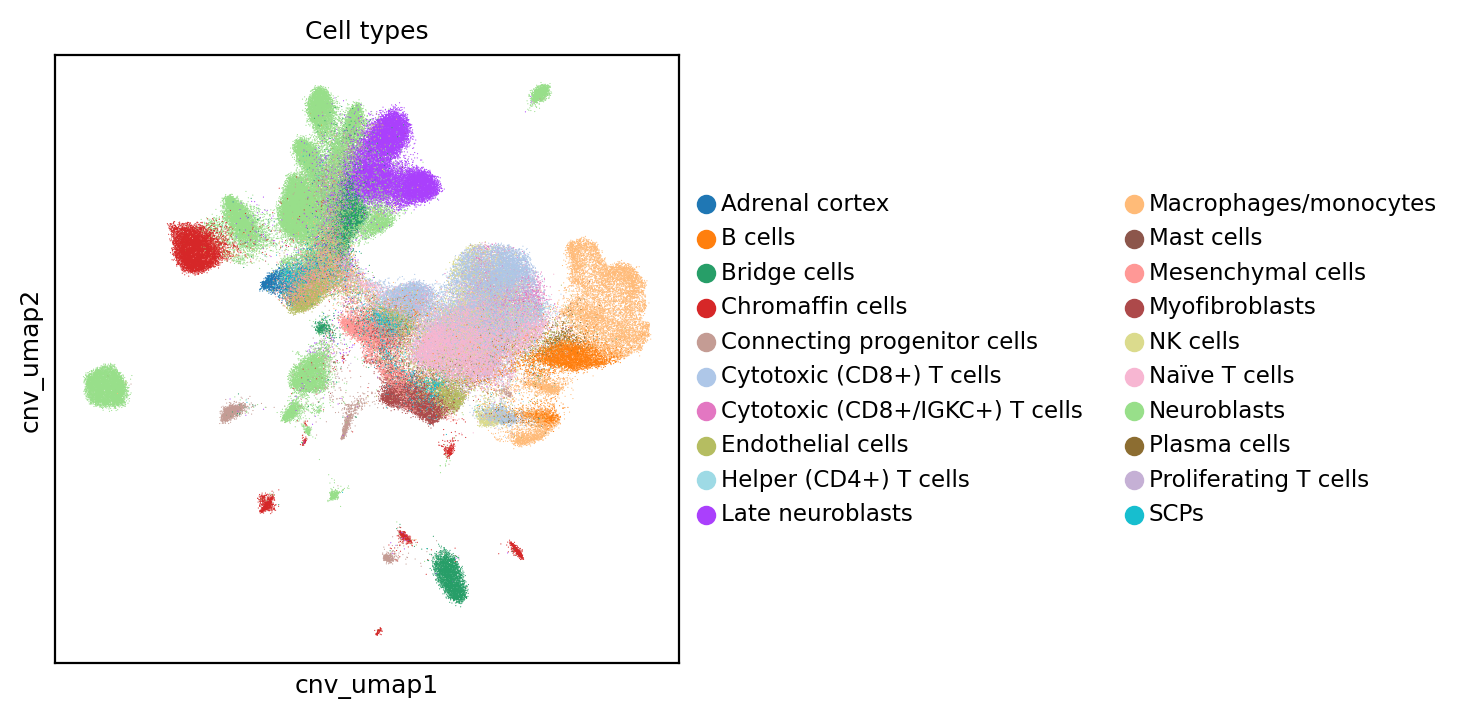

In [16]:
sc.settings.set_figure_params(figsize=(4,4), dpi_save=400, dpi=100, fontsize=9)

# CNV clusters
cnv.pl.umap(adata, color="cnv_leiden", legend_loc="on data", show=False, title = "CNV leiden clusters")#, save='_clusters.png')

# CNV scores
cnv.pl.umap(adata, color="cnv_score", title="CNV score")#, save='_scores.png')

# Annotations
cnv.pl.umap(adata, color="annotations_final", title = "Cell types")#, save='_cell_types.png')

In [82]:
list(adata.obs['annotations_final'].unique())

['Neuroblasts',
 'Cytotoxic (CD8+) T cells',
 'Macrophages/monocytes',
 'Mesenchymal cells',
 'B cells',
 'Bridge cells',
 'Endothelial cells',
 'Connecting progenitor cells',
 'Naïve T cells',
 'Late neuroblasts',
 'Plasma cells',
 'Proliferating T cells',
 'Myofibroblasts',
 'SCPs',
 'Adrenal cortex',
 'Chromaffin cells',
 'NK cells',
 'Mast cells',
 'Cytotoxic (CD8+/IGKC+) T cells',
 'Helper (CD4+) T cells']

In [17]:
nb_cells = ['Neuroblasts', 'Mesenchymal cells', 'Bridge cells', 'Endothelial cells', 'Chromaffin cells', 
              'Connecting progenitor cells', 'Late neuroblasts', 'SCPs', 'Adrenal cortex', 'Myofibroblasts',]

immune_cells = ['Cytotoxic (CD8+) T cells', 'B cells', 'Naïve T cells', 'Plasma cells',
                'NK cells', 'Mast cells', 'Cytotoxic (CD8+/IGKC+) T cells', 'Helper (CD4+) T cells', 'Proliferating T cells']

# subset adata to just nb cell types
sa_subset = adata[adata.obs['annotations_final'].isin(nb_cells)].copy()
immune_subset = adata[adata.obs['annotations_final'].isin(immune_cells)].copy()

In [18]:
# Clip to remove outliers
sa_subset.obsm["X_cnv"].data = np.clip(sa_subset.obsm["X_cnv"].data, -0.05, 0.05)
immune_subset.obsm["X_cnv"].data = np.clip(immune_subset.obsm["X_cnv"].data, -0.05, 0.05)

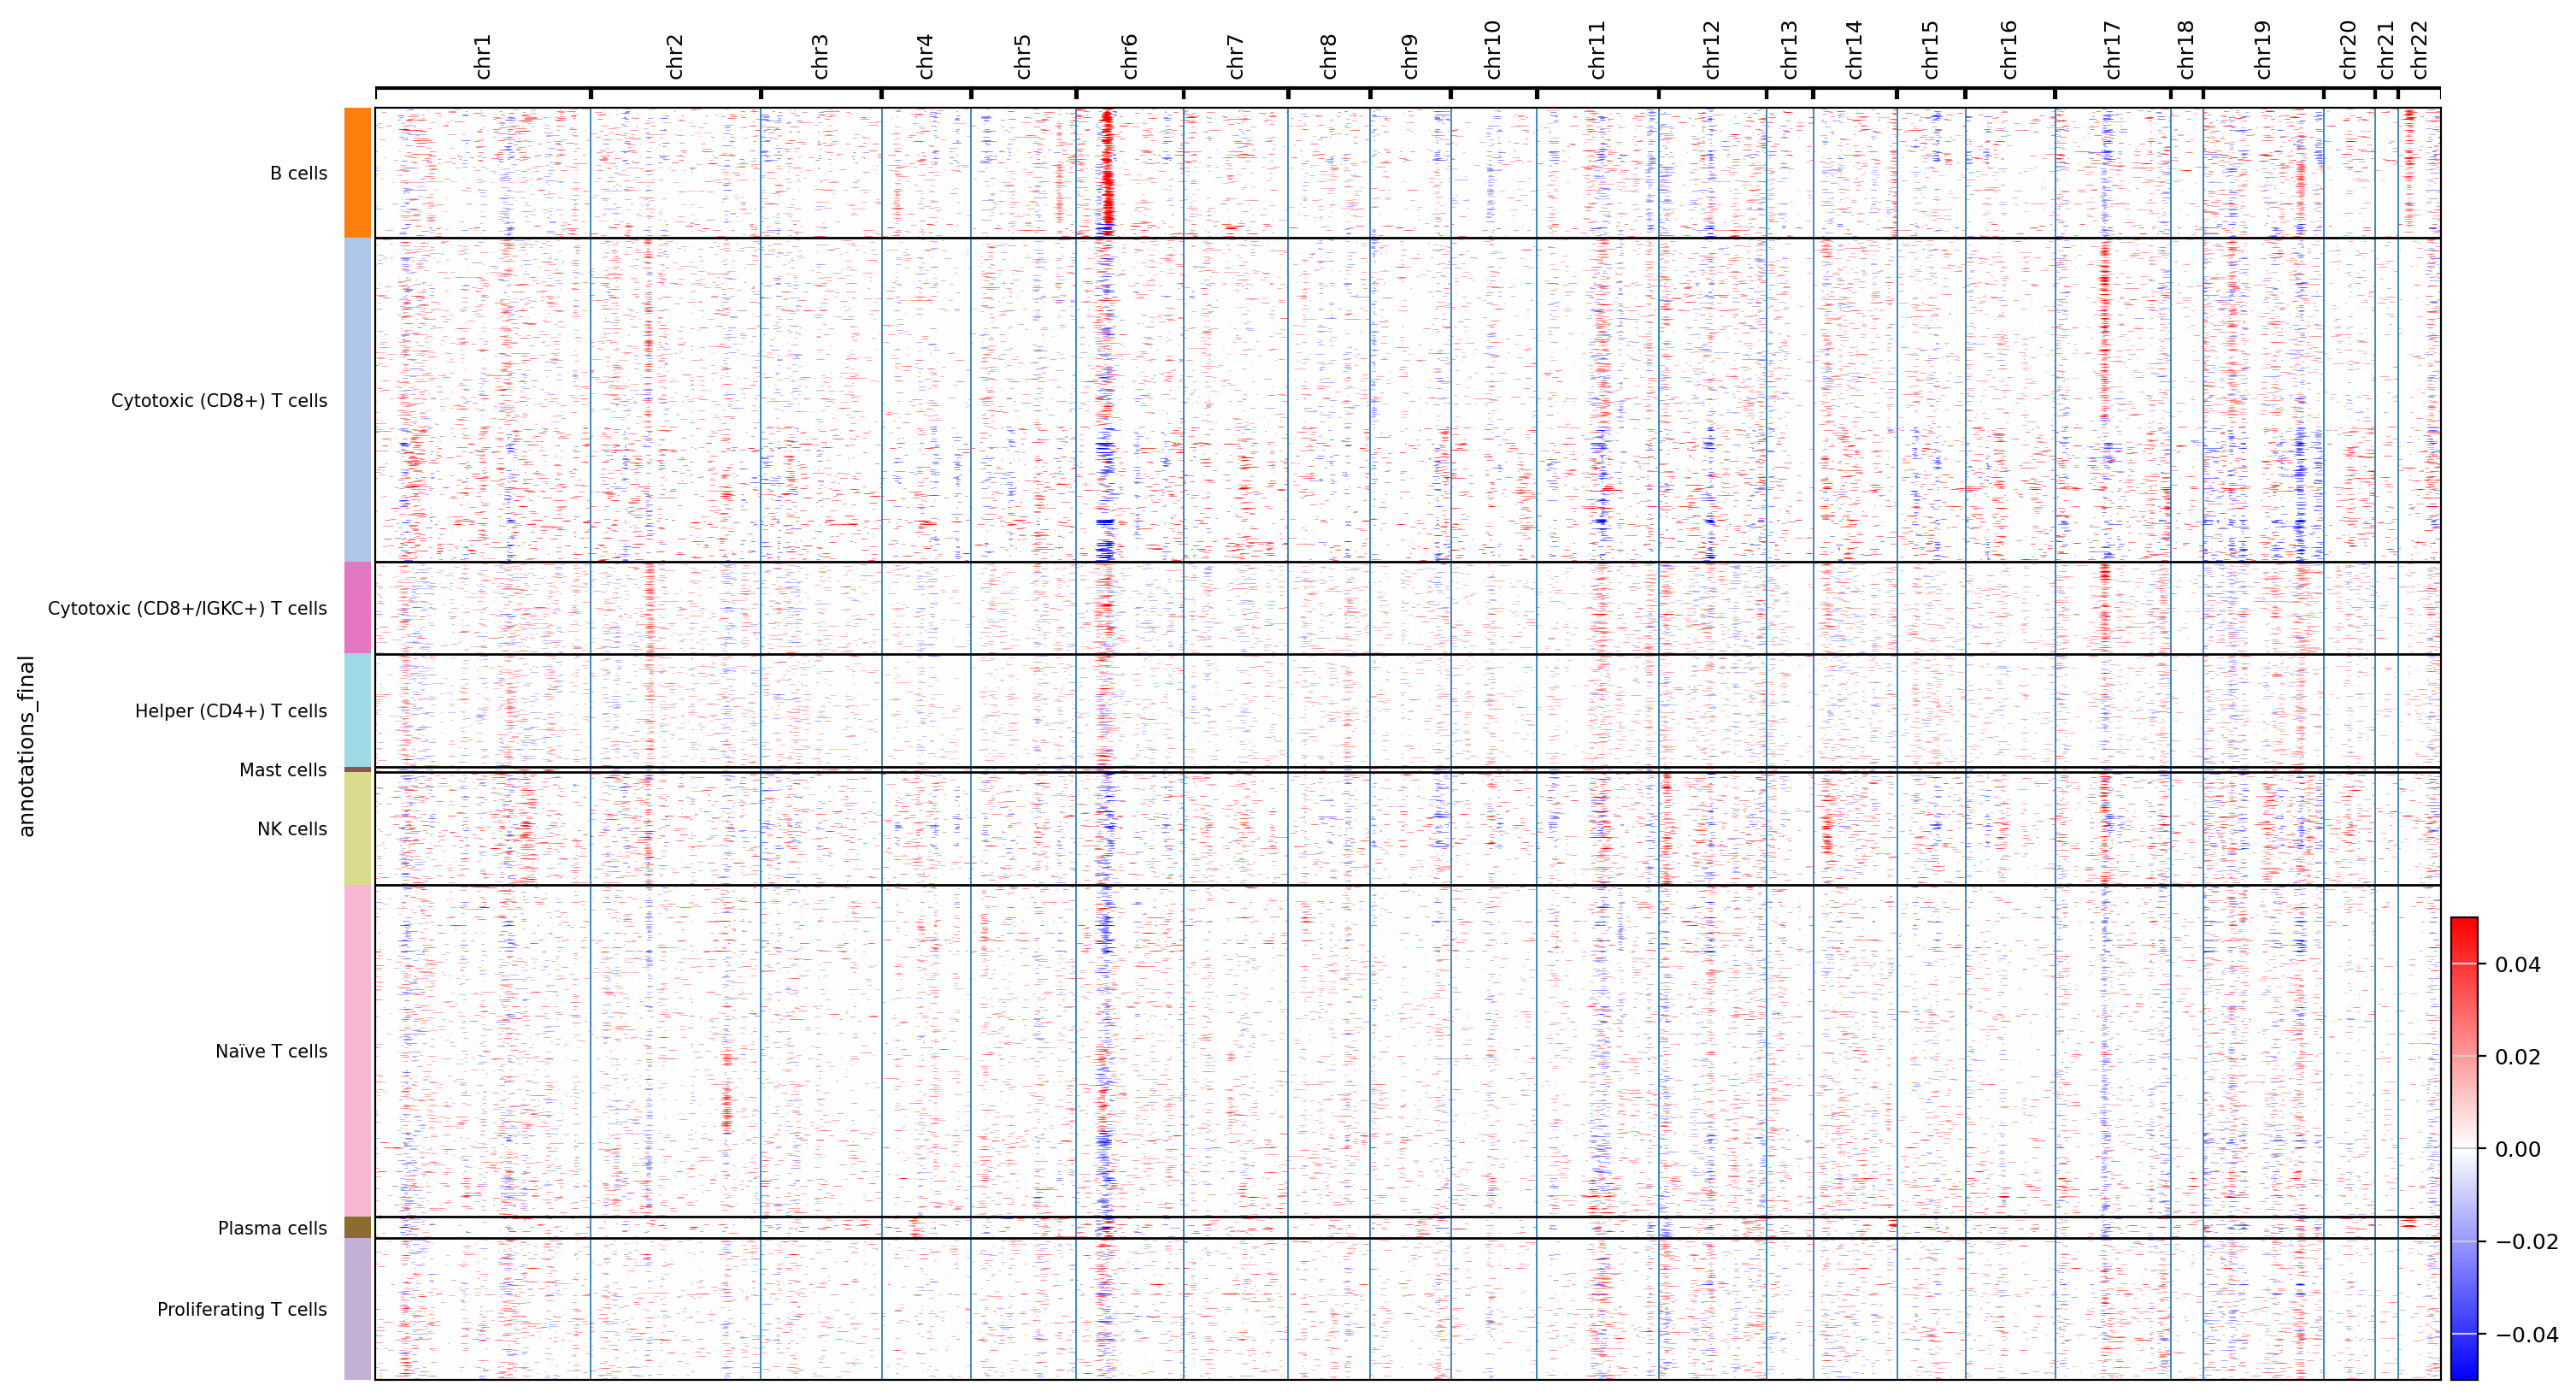

In [19]:
# Heatmap of control (immune) cells
cnv.pl.chromosome_heatmap(immune_subset, groupby="annotations_final", save='_cnv_normal.png')

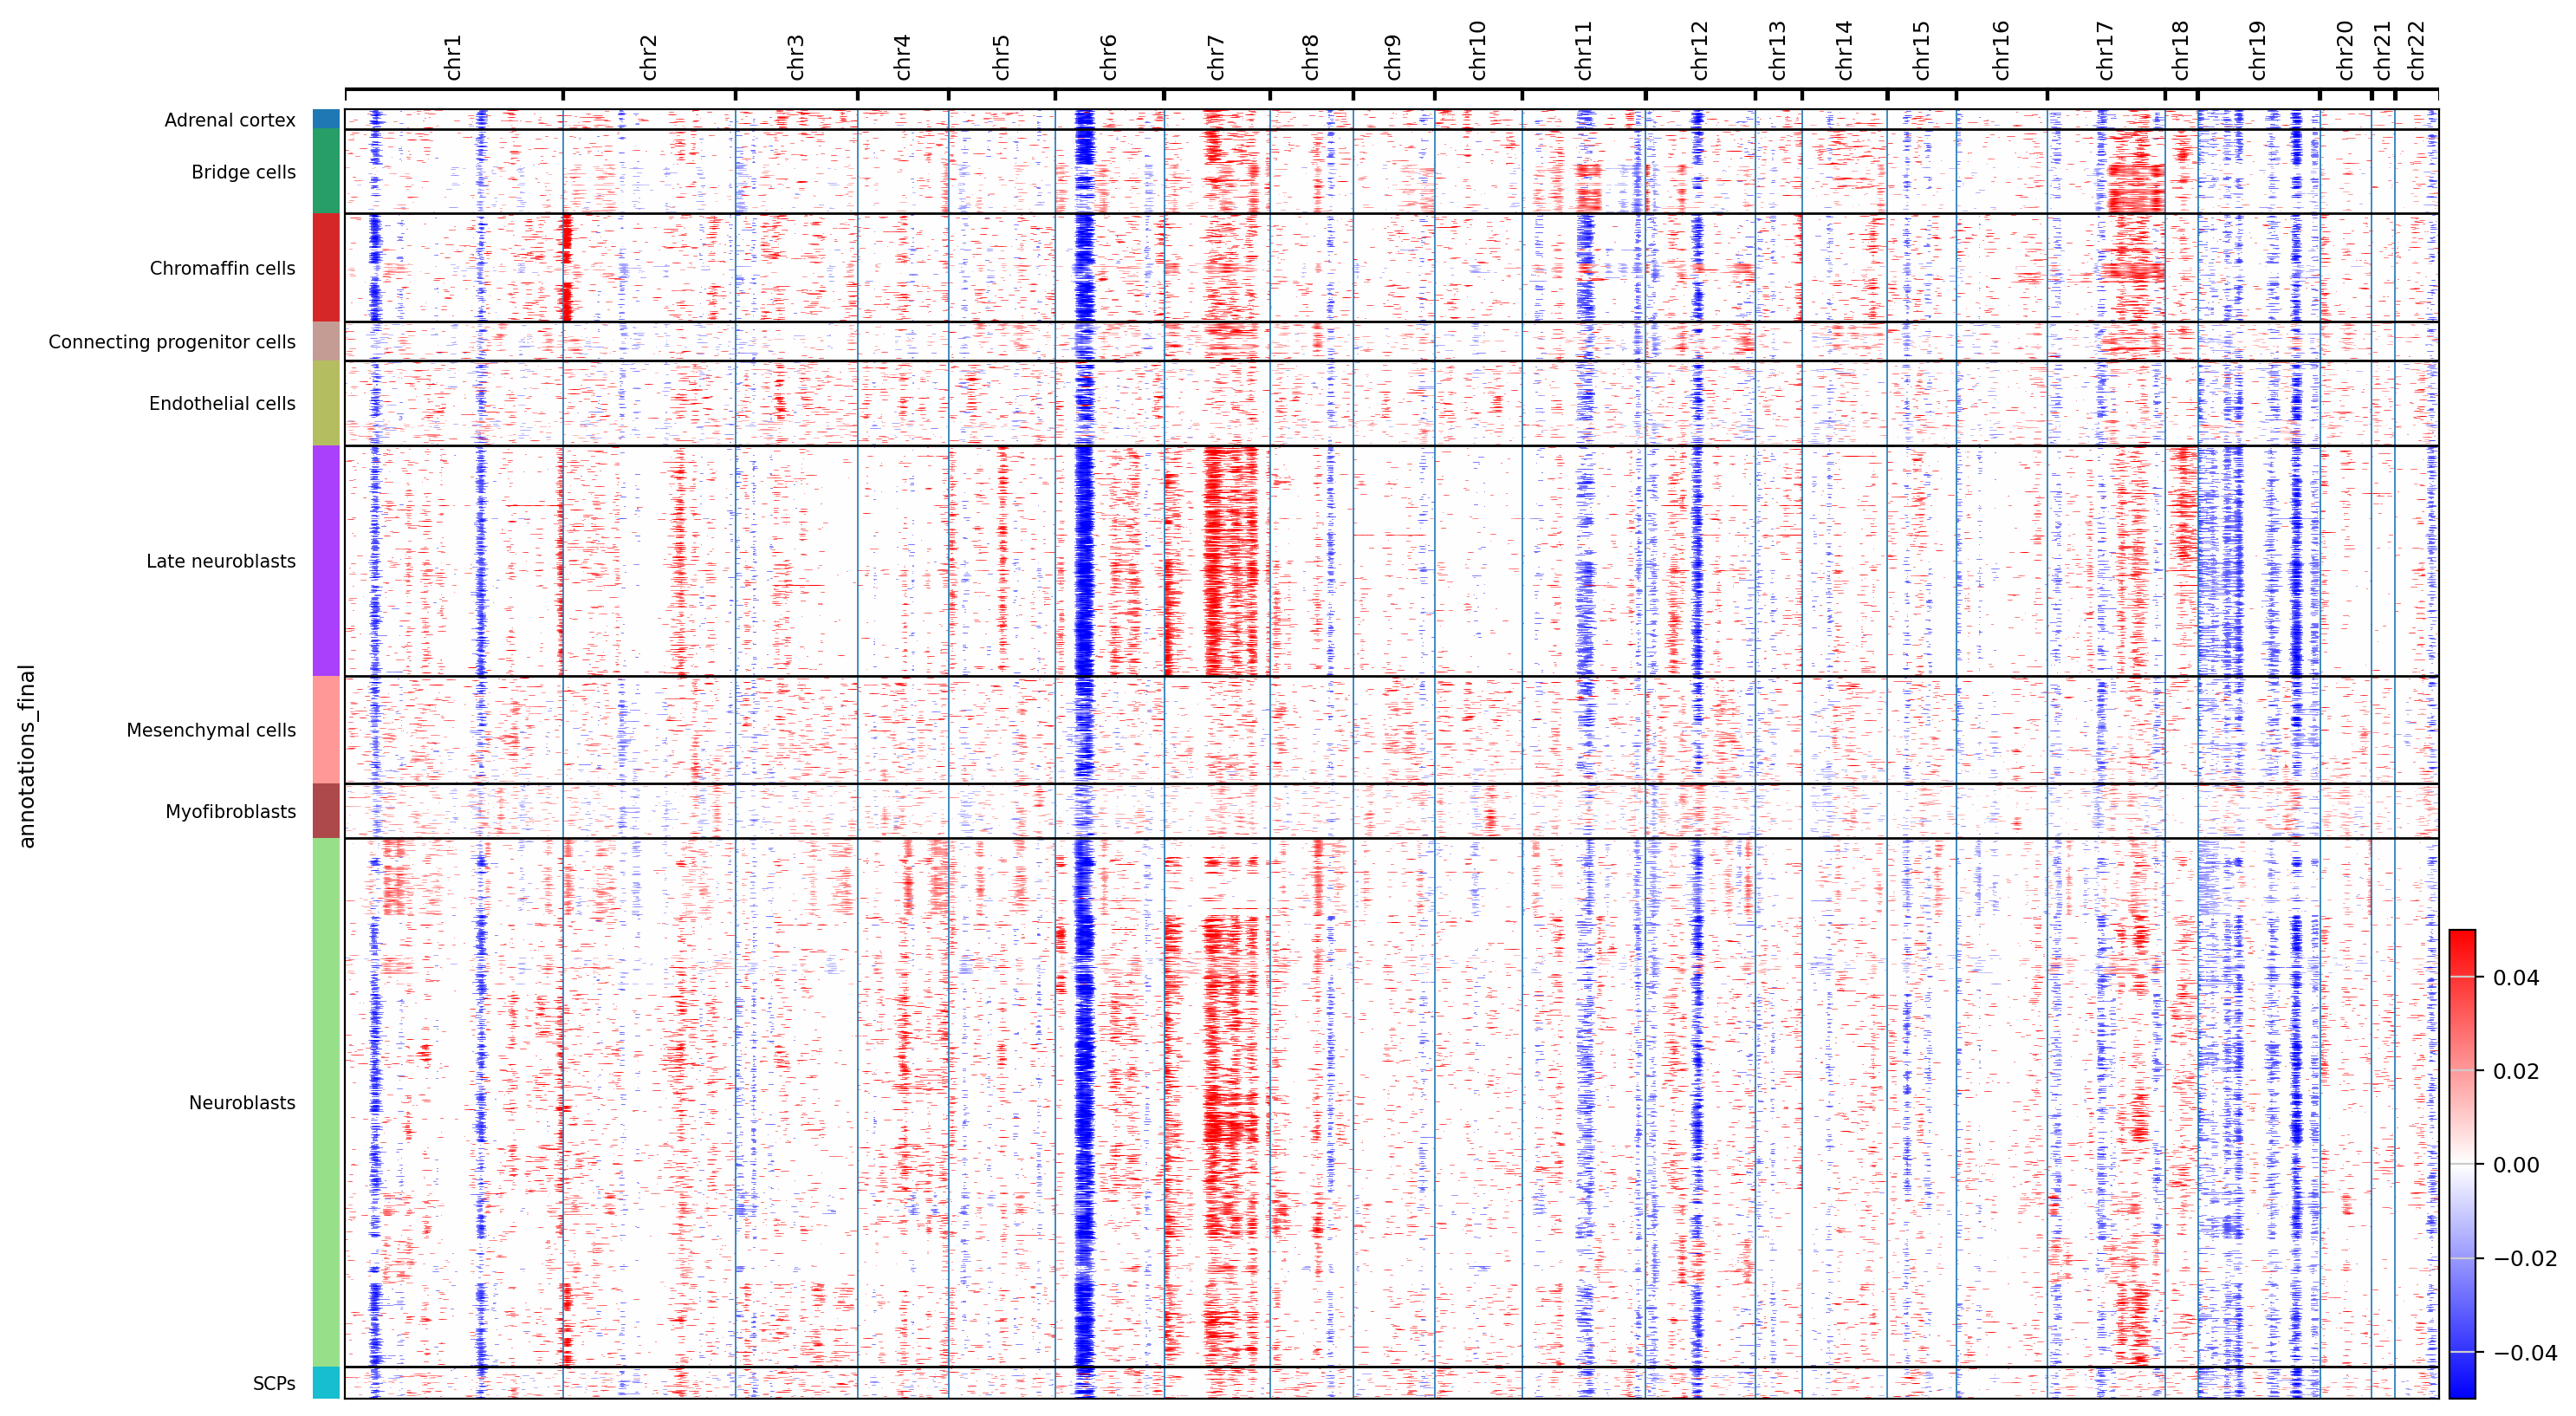

In [20]:
# Heatmap of tumor cells
cnv.pl.chromosome_heatmap(sa_subset, groupby="annotations_final", save='_cnv_tumor.png')

### Running on control + NB datset